# Social_Network_ads Learning Project:

In this, we are going to create an SVM model that directly predicts weather a customer is going to purchase a product or not based on the age and estimated salary.


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
%matplotlib inline

# Getting data

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


# Exploratory Data Analysis

Firstly,checking for null values in the dataset.

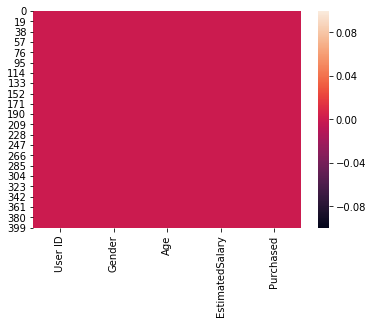

In [5]:
sns.heatmap(dataset.isnull())

Here we can see that there is no null values for the given dataset.

In [6]:
dataset.drop(['User ID'], axis=1, inplace=True)

In [7]:
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


# Checking Correlation

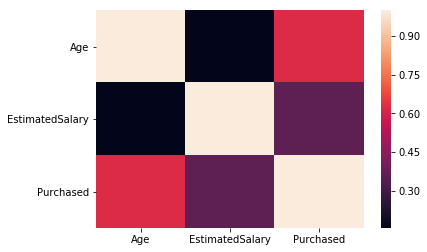

In [8]:
sns.heatmap(dataset.corr())

Here we can see that Gender column is not shown in Correlation. Hence we need to convert it into numbers by using get_dummies 

In [9]:
gender= pd.get_dummies(dataset['Gender'],drop_first=True)

In [10]:
dataset.drop('Gender',axis=1,inplace=True)

In [11]:
data=pd.concat([dataset,gender], axis= 1)

In [12]:
data.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [13]:
data.corr()

,Age,EstimatedSalary,Purchased,Male
Age,1.000000,0.155238,0.622454,-0.073741
EstimatedSalary,0.155238,1.000000,0.362083,-0.060435
Purchased,0.622454,0.362083,1.000000,-0.042469
Male,-0.073741,-0.060435,-0.042469,1.000000


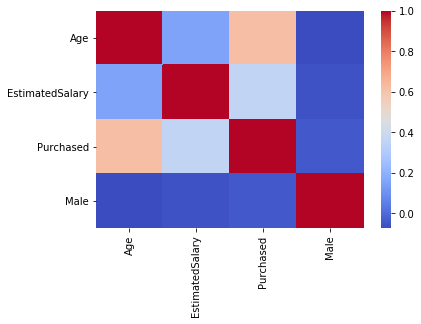

In [14]:
sns.heatmap(data.corr(), cmap='coolwarm')

In [15]:
data.drop('Male', axis=1, inplace=True)

In [16]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [17]:
data.mean()

Age                   37.6550
EstimatedSalary    69742.5000
Purchased              0.3575
dtype: float64

## Standardize the Variables

Because the Decision tree classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the decision tree classifier, than variables that are on a small scale.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
scaled_array=scaler.fit_transform(dataset.drop('Purchased', axis=1))

In [21]:
X=pd.DataFrame(data=scaled_array, columns=dataset.columns[:-1])

In [22]:
X.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [23]:
y=dataset['Purchased']

## Training and testing the data

Split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 361 to 1
Data columns (total 2 columns):
Age                280 non-null float64
EstimatedSalary    280 non-null float64
dtypes: float64(2)
memory usage: 6.6 KB


In [27]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 43 to 39
Data columns (total 2 columns):
Age                120 non-null float64
EstimatedSalary    120 non-null float64
dtypes: float64(2)
memory usage: 2.8 KB


## Creating and Training the Model

In [28]:
from sklearn.svm import SVC

In [29]:

cl=SVC()

In [30]:
cl.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
ypred=cl.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(y_test,ypred)

array([[71,  6],
       [ 2, 41]], dtype=int64)

In [34]:
from sklearn import metrics

In [35]:
metrics.mean_absolute_error(y_test, ypred)

0.06666666666666667

Hence absolute mean error is very small, hence our model is a good model!!

In [36]:
from sklearn.metrics import classification_report

In [37]:
classification_report(y_test,ypred)

'             precision    recall  f1-score   support\n\n          0       0.97      0.92      0.95        77\n          1       0.87      0.95      0.91        43\n\navg / total       0.94      0.93      0.93       120\n'

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,ypred)

0.9333333333333333

Also, Accuracy score is quite good.. (92)%. 